# Let's Grow More Data Science Virtual Internship Program June 2023

# LGMVIP June 2023

## BY: S.Madhesh

### BEGINNER LEVEL TASK


## TASK 4:  Music Recommendation System

Music recommender systems can suggest songs to users based on their listening patterns

### Dataset link : https://www.kaggle.com/c/kkbox-music-recommendation-challenge/data

### Importing Libraries

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
ntr = 7000
nts = 3000
data = pd.read_csv('train.csv',nrows =ntr)
names=['msno','song_id','source_system_tab','source_screen_name','source_type','target']
test1 = pd.read_csv('train.csv',names = names, skiprows=ntr, nrows = nts )
songs = pd.read_csv('songs.csv')
members = pd.read_csv('members.csv')

In [90]:
data.head(10)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1
5,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3Hg5kugV1S0wzEVLAEfqjIV5UHzb7bCrdBRQlGygLvU=,explore,Explore,online-playlist,1
6,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,VkILU0H1h3NMmk9MQrXouNudGk5n8Ls5cqRRuBxeTh4=,my library,Local playlist more,local-playlist,1
7,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,bPIvRTzfHxH5LgHrStll+tYwSQNVV8PySgA3M1PfTgc=,explore,Explore,online-playlist,1
8,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,/bU6IRSK+YNlNbaTkxo7bhsb2EDLPrnksdX3ggcZNhI=,my library,Local playlist more,local-library,1
9,uHqAtShXTRXju5GE8ri3ITsVFepPf8jUoCF7ffNOuqE=,EbI7xoNxI+3QSsiHxL13zBdgHIJOwa3srHd7cDcnJ0g=,my library,Local playlist more,local-library,1


In [91]:
data.sample(10)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
1701,n3/SmbEYwx86VlhZnOhRFIEqkfjprJwVuPP5umE44C8=,IhNTvk4edMSv0PCLIS6Ry23aEYtKEA/KwbJNi1OV84A=,my library,Local playlist more,local-playlist,1
5204,0EBSLtWf2Cd0XyC7PwugzVd5v0cy2ws4jcVQGWfFOS8=,G669v8UyoPAR4Lt6Ri89bbOt5b2gZNXSbuWn8bNjfoI=,my library,Search,online-playlist,1
4503,aBVEpnvmrRIaB8vgUPSFLEQnap1+izOkcUZRkD2S6vY=,mcYOteyPPVdG51WbJvl1dpmJMOcSZ6Q2YvSiVsTqiNE=,my library,Local playlist more,local-library,1
536,uhovNdbWCJ9XX96mEEcSOX//np6kjxBILpotKtyNdY0=,sIP39gcYi1ctJsaio2qtzAuUAFT543cLoOa0+A8uBmM=,my library,Local playlist more,local-playlist,1
2088,xQPZWuz3G7uWnj1rcEdizrdr1W+Evu97bS5DGnpxZZk=,M5jomDIbTepOkTFwYQ8CSAPObDTzPT93Uhc6+OMjtPk=,my library,Local playlist more,local-library,1
400,AlZcgP55T9abwVPS9F7JVwdgsU02YjIPWqJ2cTINWsA=,YJKHI4Asj1oM5vJftbISis2QYliVSExtWiWnwb7TOgo=,discover,Discover Chart,online-playlist,1
6914,Sf1RzZWJK0wf73rpnRA6tDF/iGV/HVJ0JETA24/Z29w=,KJFvSzHej+J28jmjw0TN9gM9y5S4wADTFgO42rWM6rQ=,my library,Local playlist more,local-playlist,0
1628,uGvtjreX1ZZwpL+1nTH67igZbBKCsjzYs7U6IZb8bVI=,H01zLhr2Zq0X/38SnCe3j1p9KIKTd9SD3dJLIPrEf48=,my library,Local playlist more,local-playlist,0
6986,kOXcer+//oOLtOB6JLhxNqj/3YyTH2m+kWfvYTtMc7I=,me3RCpFszR/kHPYFSho3cBHotzUNGh8CCOeRpkfLJcI=,my library,Local playlist more,album,0
2812,xLu8Cq5zF9Rni2yNN5WbgzPn9h9KGM5G0PSbasYZk10=,wBTWuHbjdjxnG1lQcbqnK4FddV24rUhuyrYLd9c/hmk=,my library,Local playlist more,local-library,1


In [92]:
data.shape

(7000, 6)

In [93]:
data.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target'],
      dtype='object')

In [94]:
data.describe()

,target
count,7000.000000
mean,0.783429
std,0.411937
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   msno                7000 non-null   object
 1   song_id             7000 non-null   object
 2   source_system_tab   6986 non-null   object
 3   source_screen_name  6815 non-null   object
 4   source_type         6986 non-null   object
 5   target              7000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 328.2+ KB


In [96]:
data.isnull().sum()

msno                    0
song_id                 0
source_system_tab      14
source_screen_name    185
source_type            14
target                  0
dtype: int64

### Songs Datasets

In [97]:
songs.head(10)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0
5,kKJ2JNU5h8rphyW21ovC+RZU+yEHPM+3w85J37p7vEQ=,235520,864|857|850|843,貴族精選,Joe Hisaishi,Hayao Miyazaki,17.0
6,N9vbanw7BSMoUgdfJlgX1aZPE1XZg8OS1wf88AQEcMc=,226220,458,伍佰 & China Blue,Jonathan Lee,NaN,3.0
7,GsCpr618xfveHYJdo+E5SybrpR906tsjLMeKyrCNw8s=,276793,465,光良 (Michael Wong),光良,彭資閔,3.0
8,oTi7oINPX+rxoGp+3O6llSltQTl80jDqHoULfRoLcG4=,228623,465,林俊傑 (JJ Lin),JJ Lin,Wu Qing Feng,3.0
9,btcG03OHY3GNKWccPP0auvtSbhxog/kllIIOx5grE/k=,232629,352|1995,Kodaline,Stephen Garrigan| Mark Prendergast| Vincent Ma...,Stephen Garrigan| Mark Prendergast| Vincent Ma...,52.0


In [98]:
songs.sample(10)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
680641,oQpv/PDHZYqAjiH3/gYuQwrBZqZQbAM0v6AzDPEwmhc=,247656,444,스윙스| 기리보이| 씨잼 (Cjamm),NaN,NaN,31.0
1077697,b8iWdsevsfspSrhH3qcp/vBYqHUCL6rNiWrvleP/SeA=,205226,352|1995,Way Of The Eagle feat. Illy,Jan Skubiszewski|A. Murray,Jan Skubiszewski|A. Murray,52.0
12544,uuYX1EGhKFsYhcRvafm3j8z3eS5YpPx/EvFs4H7+90w=,221727,465|430,Madilyn Bailey,Dan Smith,NaN,52.0
233800,XpLQP5S2ojJUeUlcRobWr3ukuwOhRzrjtC+6HehGbWY=,100496,947,Kundalini: Yoga| Relaxation and Meditation,NaN,NaN,-1.0
1925014,g7k3+2rWxgSgtrv75IcV+mSOugDljaf/ESfqdADRccA=,210001,2122,Sam Taylor,NaN,NaN,-1.0
2031081,x1O6+w1e0VHXEvTKnqUaVbFxLN9SHL2XI4DIWzb49xY=,123637,465,Sunny Afternoon Original Cast,Ray Davies,NaN,52.0
94389,0LK5UNw5pXXjULf51rkWDbCM/csdwSp3XOrRNhKxhUE=,260992,451,王菲 (Faye Wong),Ming Huang Yang,NaN,24.0
996131,g+84zJQpskyXyh3GXbWvjhd/J/p0BknOR0xcppWqX9M=,409495,1609,Mr. Thruout,NaN,NaN,52.0
1218645,Xu/+D02Wseyb0oN5BrFA9ut8ZXTkFnTV/jXzxBwuISM=,143406,NaN,La Fine Equipe,Blanka,NaN,-1.0
2089446,N9ZmckZfKmuYFbM1zEmnJjj/YCpGZmQOyPzoZBG0w4A=,29692,1259,Snoop Dogg,NaN,NaN,52.0


In [99]:
songs.shape

(2296320, 7)

In [100]:
songs.columns

Index(['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language'],
      dtype='object')

In [101]:
songs.describe()

,song_length,language
count,2.296320e+06,2.296319e+06
mean,2.469935e+05,3.237800e+01
std,1.609200e+05,2.433241e+01
min,1.850000e+02,-1.000000e+00
25%,1.836000e+05,-1.000000e+00
50%,2.266270e+05,5.200000e+01
75%,2.772690e+05,5.200000e+01
max,1.217385e+07,5.900000e+01


In [102]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [103]:
songs.isnull().sum()

song_id              0
song_length          0
genre_ids        94116
artist_name          0
composer       1071354
lyricist       1945268
language             1
dtype: int64

### Members datasets

In [104]:
members.head(10)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613
5,zgPOEyUn5a/Fvuzb3m69ajzxjkbblVtObglW89FzLdo=,13,43,female,9,20120703,20171006
6,Sw9AT8QoR4wWiNUqHZUH6g5ahzGUx4lo1g+Y3xE2f2M=,1,0,NaN,4,20160326,20160329
7,pg6bT2XZkSP1TDBy4qn3HBPY/HffKQ/bg8WIISQYBSY=,1,0,NaN,7,20160130,20170930
8,kfk1AdTNH2dNqF5LzIs4e0vwGPejw2jrnFjJlcYnEgk=,1,0,NaN,7,20110111,20170930
9,tscijwx4dbEp0NXGl+iFtHJ8zrj+TkcMrduOQk9t+gE=,1,0,NaN,7,20160217,20170613


In [105]:
members.sample(10)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
15381,9dGvBZS75RntNxH56CR8yAhbwXPMvJcKh8byYLigy7s=,1,0,NaN,7,20120525,20170930
10638,PXf4wzIDMBFS/TYu0WcjSwp6li+8kuVOK3o7UkpjqDE=,1,0,NaN,4,20170117,20170120
11687,qFgGSlBX4nFXMmEETmxgEjeHNsrjQoI8mL7MbdvAt1U=,1,0,NaN,4,20160416,20161105
26038,q46i0S5ELmNp33AbMH4iZQsbwiRbYw16JrrprofQvOA=,1,0,NaN,7,20140604,20170919
23429,iv2rndCNWc3ayP9sREzQb6kpmWo+jUy7xXoKrIn/e6U=,15,23,female,9,20160808,20170924
23023,F7hj1xr7XVwHdZyrj13vaAa5Wz66uDu8YLZSkbL06Zw=,1,0,NaN,7,20150219,20171004
2413,7KhRhcI3v4S9BJbkCxAcU2qBeytYtGxVPYbtuOOYb8Q=,1,0,NaN,4,20161227,20161230
16112,F1XrPuJaY0UI3vTLzZblMLzID1ir7uTUJWCN6mz5xO8=,1,0,NaN,4,20170107,20170110
21222,waFFprUhQRjBSEcNCKObT90cr/AYmmeHqa0LLnQp0so=,22,35,male,9,20070417,20170717
27553,slgvY7VWzAdD4giqrdanUPoC9bo6P6ThCjx+YDP2huc=,13,29,female,7,20111227,20171005


In [106]:
members.shape

(34403, 7)

In [107]:
members.columns

Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date'],
      dtype='object')

In [108]:
members.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [109]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [110]:
members.isnull().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

### Data Visualization

<AxesSubplot:xlabel='source_system_tab', ylabel='count'>

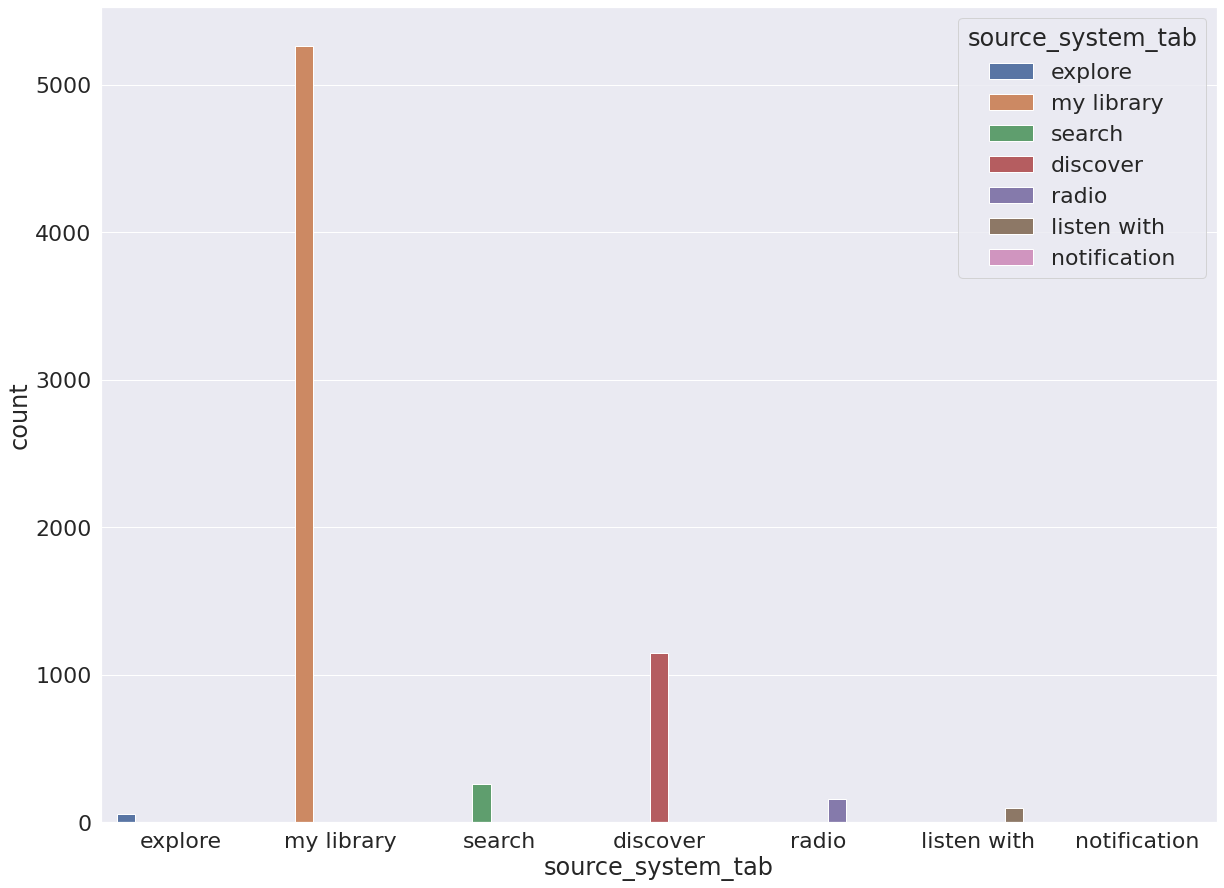

In [111]:
plt.figure(figsize=(20,15))
sns.countplot(x = data['source_system_tab'],hue=data['source_system_tab'])

<AxesSubplot:xlabel='source_system_tab', ylabel='count'>

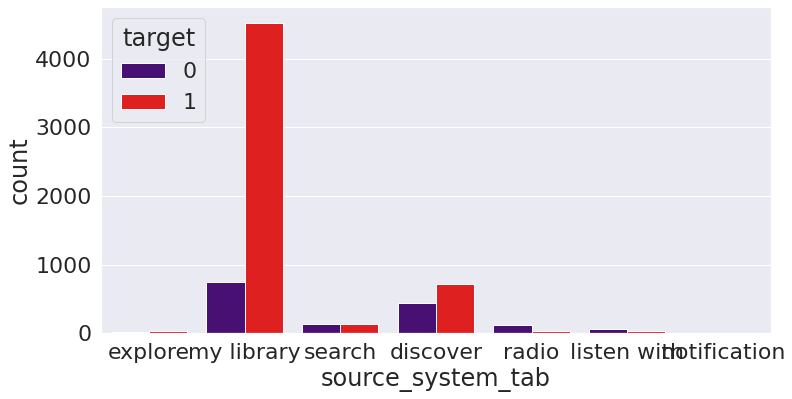

In [112]:
plt.figure(figsize=(12,6))
sns.countplot(x = data['source_system_tab'],palette=['Indigo','Red'],hue=data['target'])
                                                                            

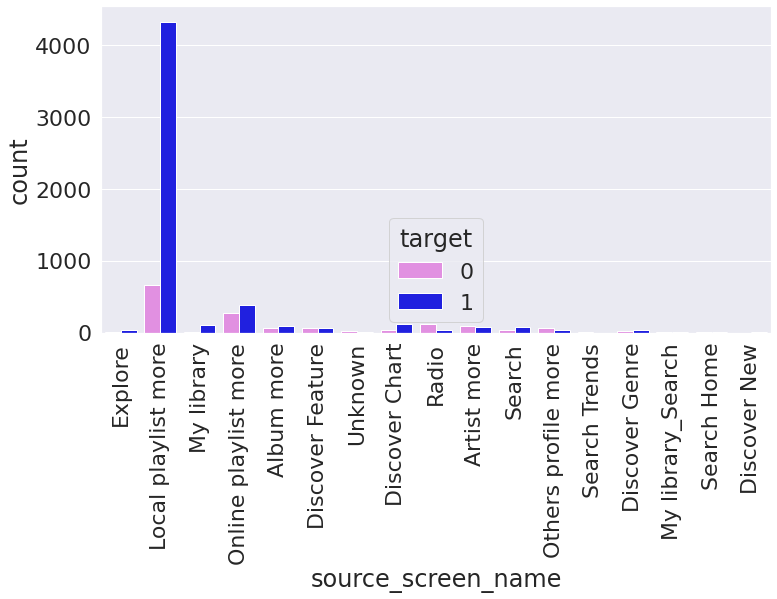

In [113]:
plt.figure(figsize=(12,6))
sns.countplot(x = data['source_screen_name'],palette=['violet','blue'],hue=data['target'],data = data,orient='v')
plt.xticks(rotation =90)
plt.show()

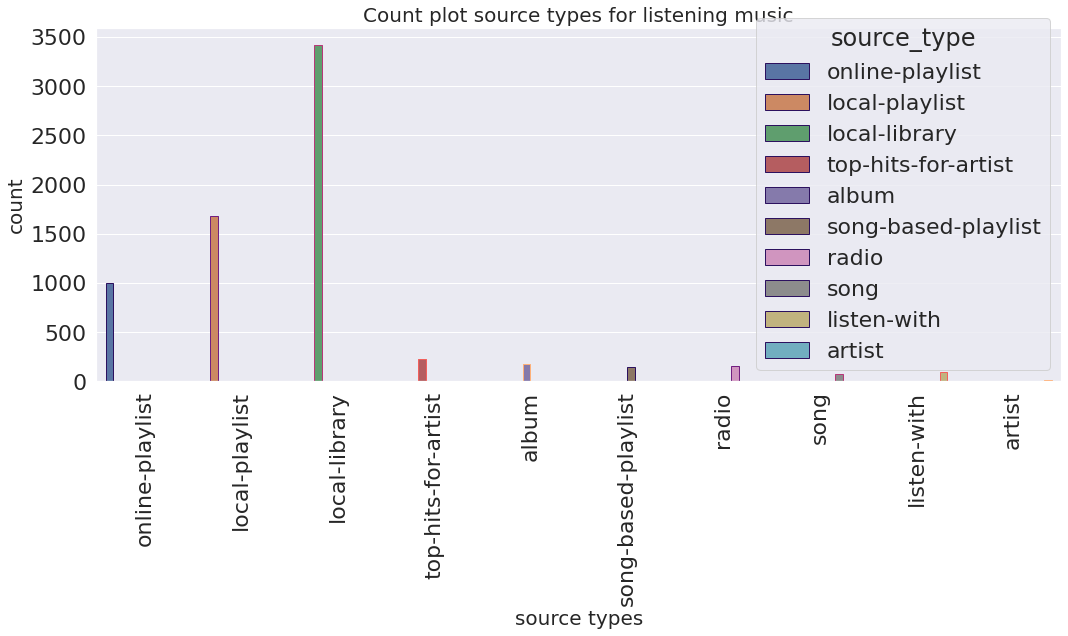

In [114]:
plt.figure(figsize=(15,9))
sns.set(font_scale=2)
sns.countplot(x='source_type',hue='source_type',data=data,edgecolor=sns.color_palette('magma',5))
sns.set(style="ticks")
plt.xlabel('source types',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.xticks(rotation='vertical')
plt.title('Count plot source types for listening music',fontsize=20)
plt.tight_layout()

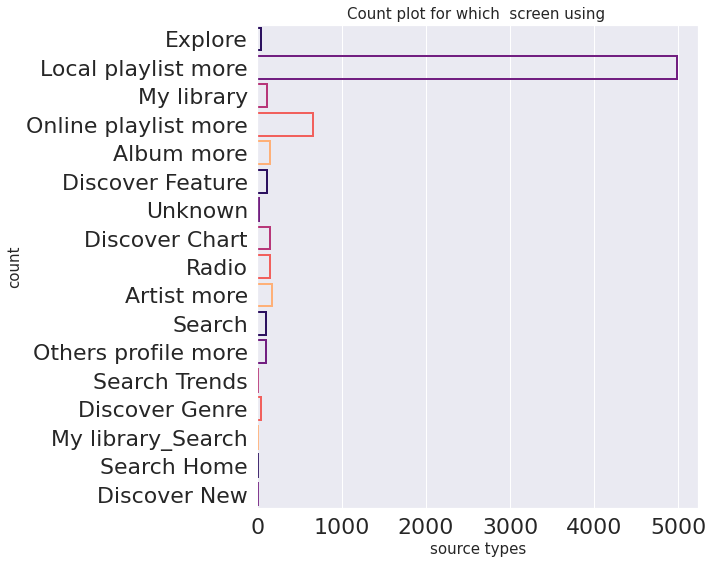

In [115]:
plt.figure(figsize=(10,8))
sns.set(font_scale=2)
sns.countplot(y='source_screen_name',data=data,facecolor=(0,0,0,0),linewidth=2,edgecolor=sns.color_palette('magma',5))
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(rotation='horizontal')
plt.title('Count plot for which  screen using ',fontsize=15)
plt.tight_layout()


In [116]:
def count_plot(data, x, hue, type):
    plt.figure(figsize = (15, 8))
    sns.set(font_scale = 2)
    sns.countplot(x = x, hue = hue, data = data)
    plt.xlabel(x, fontsize = 30)
    plt.ylabel('count', fontsize = 30)
    plt.xticks(rotation = 90)
    plt.title('Count plot for {0} in {1} data'.format(x, type), fontsize = 30)
    plt.tight_layout()

In [117]:
# Function to plot histograms for categories

def count_plot_function(data, x):
    plt.figure(figsize = (15,10))
    sns.set(font_scale = 2)
    sns.countplot(x = x, data = data)
    plt.xlabel(x, fontsize = 30)
    plt.ylabel('count', fontsize = 30)
    plt.xticks(rotation = 90)
    plt.title('Count plot', fontsize = 30)
    plt.tight_layout()

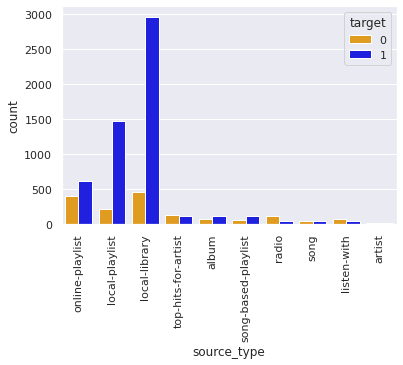

In [118]:
sns.countplot(x = data['source_type'],palette=['orange','blue'],hue=data['target'],data = data,orient='v')
plt.xticks(rotation =90)
plt.show()

### Visualization part in members.csv

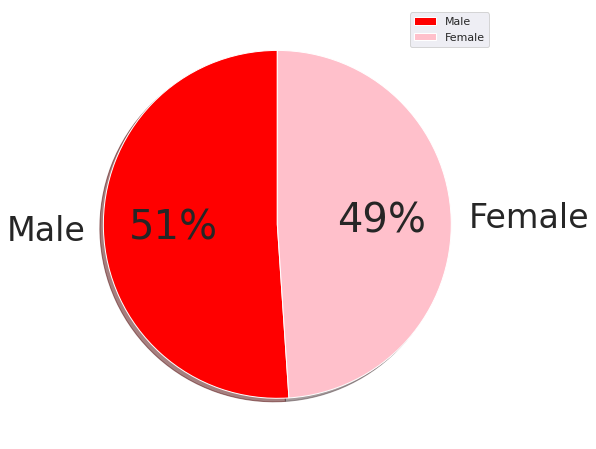

In [119]:
import matplotlib as mpl

mpl.rcParams['font.size'] = 40.0
labels = ['Male','Female']
colors = ['#FF0000','#FFC0CB']
plt.figure(figsize = (8, 8))
sizes = pd.value_counts(members.gender)
patches, texts, autotexts = plt.pie(sizes, 
                                    labels=labels,colors=colors, autopct='%.0f%%',
                                    shadow=True, radius=1,startangle=90)
for t in texts:
    t.set_size('smaller')
plt.legend()
plt.show()

<AxesSubplot:xlabel='language', ylabel='count'>

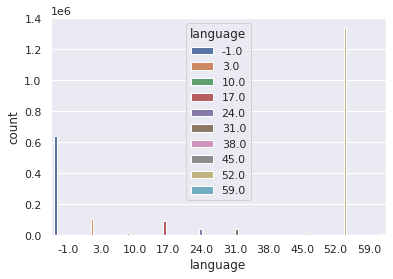

In [120]:
sns.countplot(x = songs['language'],data =data,hue=songs['language'],orient='h')

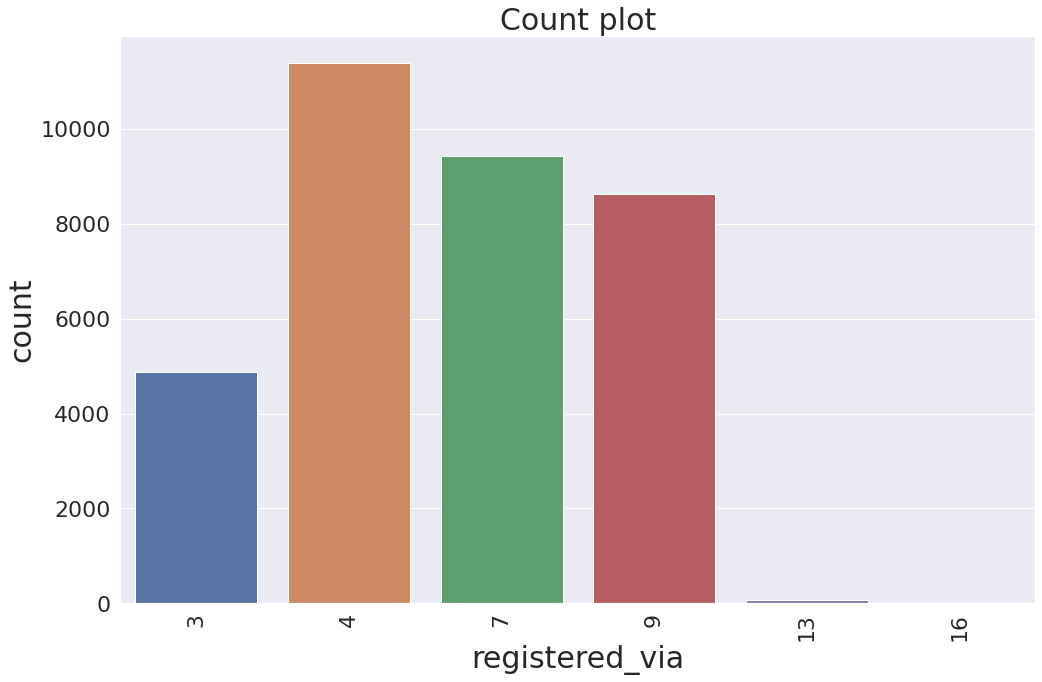

In [121]:
count_plot_function(members, 'registered_via')

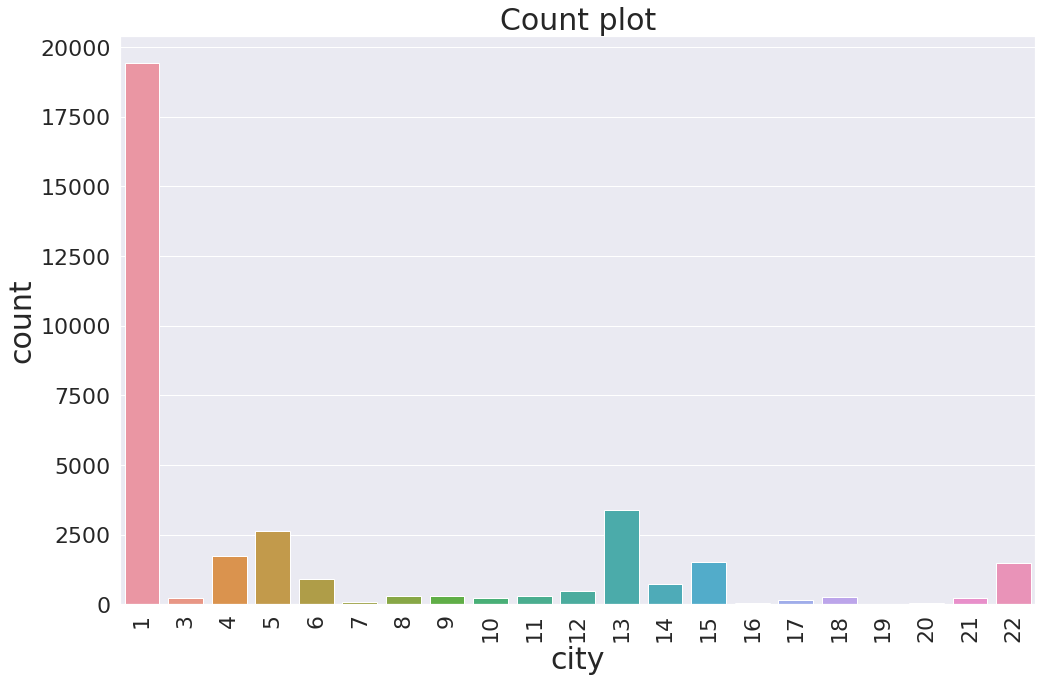

In [122]:
count_plot_function(members, 'city')

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'PDF for Registration')

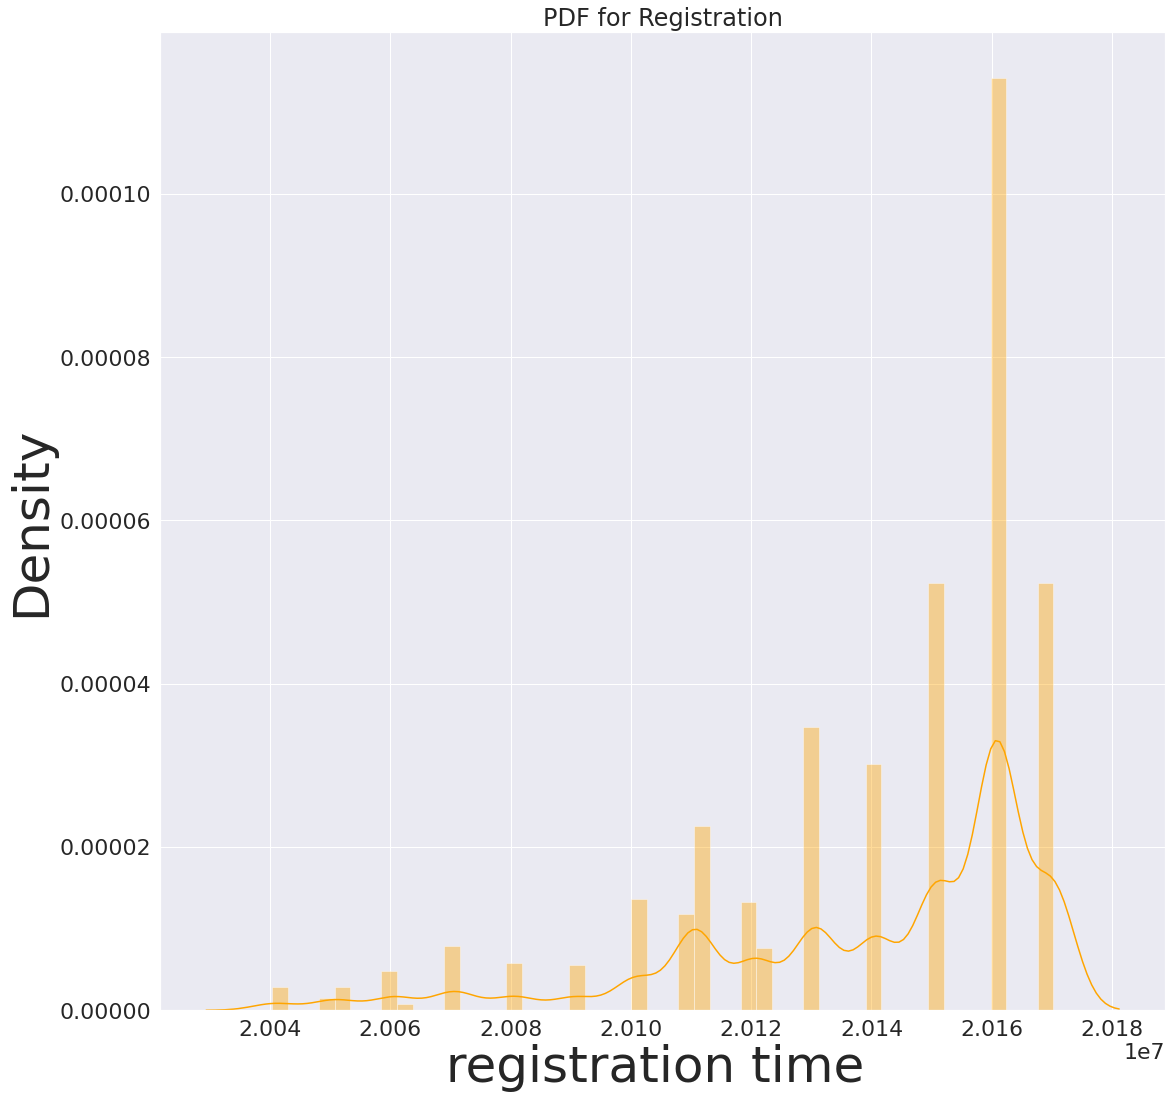

In [123]:
plt.figure(figsize = (18, 18)) 
sns.distplot(members.registration_init_time,color='orange')
sns.set(font_scale=2)
plt.ylabel('Density',fontsize=50)
plt.xlabel('registration time ' ,fontsize=50)
plt.title('PDF for Registration')

We can see that initially people were not fond of listening music but after certain amount time people started to listen music and registered themselves to this music app

In [124]:
# Function to plot PDF and CDf.

def plot_pdf_cdf(x, flag):
    plt.figure(figsize = (10, 6)) 
    kwargs = {'cumulative': True}
    if flag:
        sns.distplot(x, hist_kws = kwargs, kde_kws = kwargs,color='purple')
        plt.title('CDF for age')
    else:
        sns.distplot(x,color='purple')
        plt.title('PDF for age')
    sns.set(font_scale=2)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


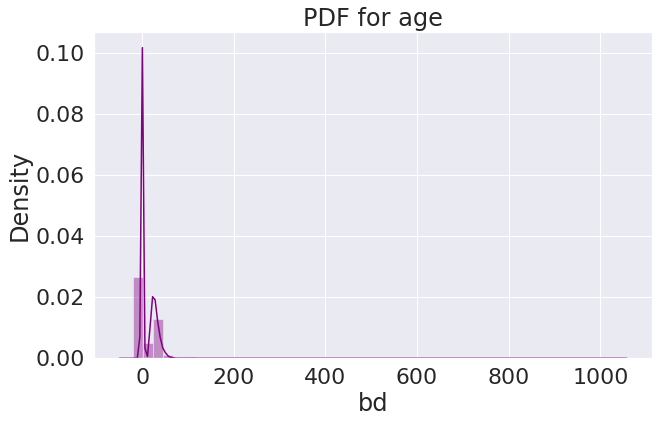

In [125]:
plot_pdf_cdf(members['bd'], False)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


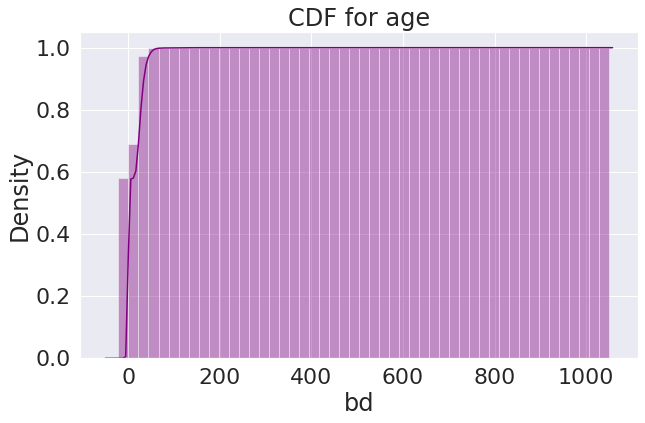

In [126]:
plot_pdf_cdf(members['bd'], True)
plt.show()

In [127]:
np.percentile(members['bd'].values, 98)

47.0

98th percentile user is of 47 age.
Means most of the user are below 50.
We can also observe via above CDF that almost 99% values are below 50. There are also some outliers like 1030, -38, -43, 1051, etc. As age cannot be negative value or more than 1000 for humans

In [128]:
#DATA PREPROCESSING AND CLEANING
test = test1.drop(['target'],axis=1)
ytr = np.array(test1['target'])

In [129]:
test_name = ['id','msno','song_id','source_system_tab',
             'source_screen_name','source_type']
test['id']=np.arange(nts)
test = test[test_name]

In [130]:
song_cols = ['song_id', 'artist_name', 'genre_ids', 'song_length', 'language']
train = data.merge(songs[song_cols], on='song_id', how='left')
test = test.merge(songs[song_cols], on='song_id', how='left')

In [131]:
members['registration_year'] = members['registration_init_time'].apply(lambda x: int(str(x)[0:4]))
members['registration_month'] = members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
members['registration_date'] = members['registration_init_time'].apply(lambda x: int(str(x)[6:8]))


In [132]:
members['expiration_year'] = members['expiration_date'].apply(lambda x: int(str(x)[0:4]))
members['expiration_month'] = members['expiration_date'].apply(lambda x: int(str(x)[4:6]))
members['expiration_date'] = members['expiration_date'].apply(lambda x: int(str(x)[6:8]))
members = members.drop(['registration_init_time'], axis=1)

In [133]:
members_cols = members.columns
train = train.merge(members[members_cols], on='msno', how='left')
test = test.merge(members[members_cols], on='msno', how='left')

In [134]:
train = train.fillna(-1)
test = test.fillna(-1)

In [135]:
import gc
del members, songs; gc.collect();

In [136]:
colm = list(train.columns)
colm.remove('target')

In [137]:
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
for col in tqdm(colm):
    if train[col].dtype == 'object':
        train[col] = train[col].apply(str)
        test[col] = test[col].apply(str)

        le = LabelEncoder()
        train_vals = list(train[col].unique())
        test_vals = list(test[col].unique())
        le.fit(train_vals + test_vals)
        train[col] = le.transform(train[col])
        test[col] = le.transform(test[col])

100%|██████████| 19/19 [00:00<00:00, 144.78it/s]


In [138]:
unique_songs = range(max(train['song_id'].max(), test['song_id'].max()))
song_popularity = pd.DataFrame({'song_id': unique_songs, 'popularity':0})

train_sorted = train.sort_values('song_id')
train_sorted.reset_index(drop=True, inplace=True)
test_sorted = test.sort_values('song_id')
test_sorted.reset_index(drop=True, inplace=True)

In [139]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


### Model Building 

In [140]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
X = np.array(train.drop(['target'], axis=1))
y = train['target'].values

X_test = np.array(test.drop(['id'], axis=1))
ids = test['id'].values

del train, test; gc.collect();

X_train, X_valid, y_train, y_valid = train_test_split(X, y, 
                    test_size=0.1, random_state = 12)
    
del X, y; gc.collect();

d_train = lgb.Dataset(X_train, label=y_train)
d_valid = lgb.Dataset(X_valid, label=y_valid) 

watchlist = [d_train, d_valid]

### Trying out basic classification models

In [141]:
def predict(m1_model):
    model = m1_model.fit(X_train,y_train)
    print('Training Score : {}'.format(model.score(X_train,y_train)))
    y_pred = model.predict(X_valid)
    #accuracy_score = m1_model.metrics.accuracy_score(y_valid,y_pred)
    #print('Accuracy Score : {}'.format(accuracy_score))
    v_test = model.predict(X_test)
    yhat = (v_test>0.5).astype(int)
    comp = (yhat==ytr).astype(int)
    acc = comp.sum()/comp.size*100
    print("Accuracy on test data for the model", acc)

### Predicting training score & accuracy on test data using
### Logistic Regression & RandomForestClassifier

In [142]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
predict(LogisticRegression())

Training Score : 0.783968253968254
Accuracy on test data for the model 74.9


### Prediction using lightgbm

In [143]:
params = {}
params['learning_rate'] = 0.4
params['application'] = 'binary'
params['max_depth'] = 15
params['num_leaves'] = 2**8
params['verbosity'] = 0
params['metric'] = 'auc'

model1 = lgb.train(params, train_set=d_train, num_boost_round=200, valid_sets=watchlist, \
early_stopping_rounds=10, verbose_eval=10)

/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.7/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007781 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

In [144]:
p_test = model1.predict(X_test)

### Printing the accuracy of lgbm model on test data

In [145]:
yhat = (p_test>0.5).astype(int)
comp = (yhat==ytr).astype(int)
acc = comp.sum()/comp.size*100
print('The accuracy of lgbm model on test data is: {0:f}%'.format(acc))

The accuracy of lgbm model on test data is: 78.566667%
